# Engenharia de Características (Feature Engineering)

A feature engineering é o processo de usar o conhecimento de domínio para tornar explícitas as informações contidas nos dados brutos. Espera-se que com esta informação adicional, o desempenho dos algoritmos de aprendizado de máquina seja melhorado.

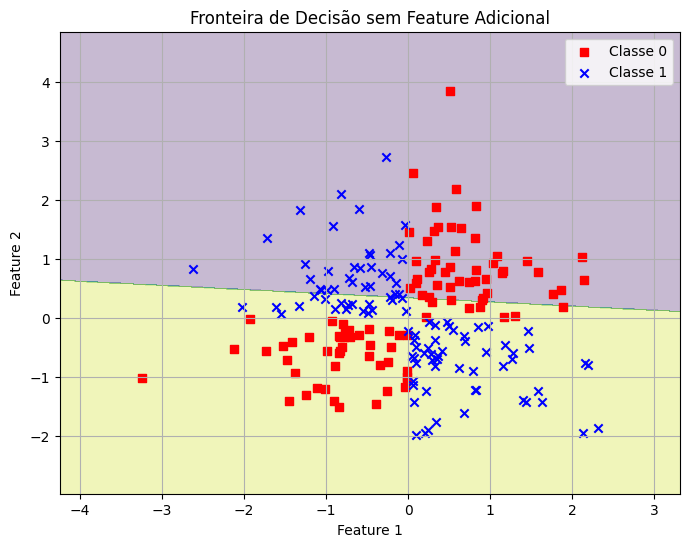

In [16]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Geração do dataset XOR
np.random.seed(42)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

# 2. Treinamento da regressão logística e visualização da fronteira de decisão em 2D sem a terceira variável
plt.figure(figsize=(8, 6))
logreg_xor = LogisticRegression(random_state=42)
logreg_xor.fit(X_xor, y_xor)
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg_xor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_xor[y_xor == 0][:, 0], X_xor[y_xor == 0][:, 1], color='red', marker='s', label='Classe 0')
plt.scatter(X_xor[y_xor == 1][:, 0], X_xor[y_xor == 1][:, 1], color='blue', marker='x', label='Classe 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão sem Feature Adicional')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Feature Engineering: Vamos adicionar uma nova variável ao dataset
## x3 = x1 * x2

/var/folders/g9/dlcnl5cd2752fb_17r927ff00000gn/T/ipykernel_39599/2931008199.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_xor_3d[y_xor == 1][:, 0], X_xor_3d[y_xor == 1][:, 1], c=X_xor_3d[y_xor == 1][:, 2], cmap='coolwarm', marker='x', label='Classe 1', edgecolors='k')


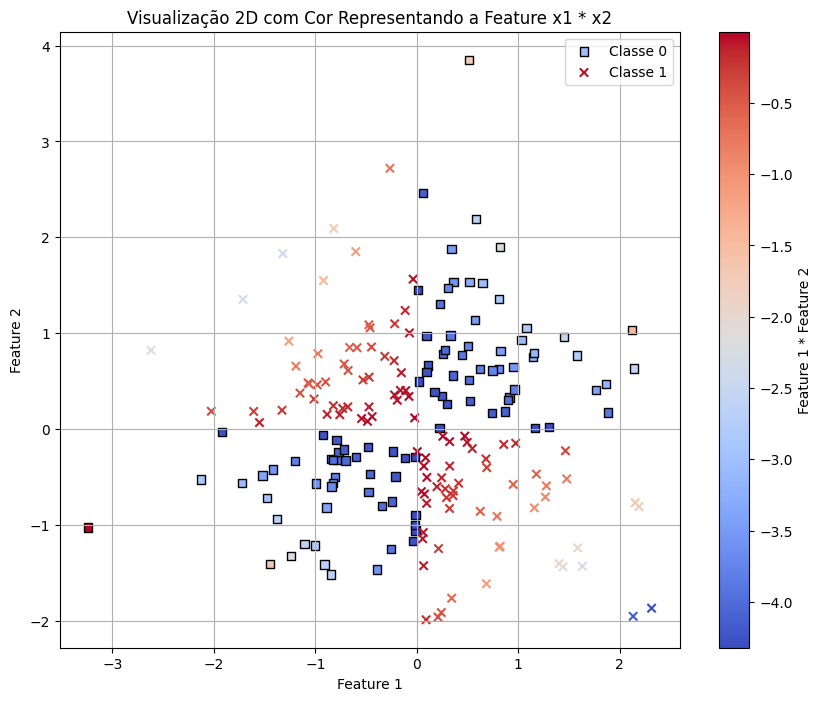

In [19]:
# 3. Adição da terceira feature x1 * x2 e visualização em 2D com coloração baseada nesta feature
X_xor_3d = np.c_[X_xor, X_xor[:, 0] * X_xor[:, 1]]

plt.figure(figsize=(10, 8))
plt.scatter(X_xor_3d[y_xor == 0][:, 0], X_xor_3d[y_xor == 0][:, 1], c=X_xor_3d[y_xor == 0][:, 2], cmap='coolwarm', marker='s', label='Classe 0', edgecolors='k')
plt.scatter(X_xor_3d[y_xor == 1][:, 0], X_xor_3d[y_xor == 1][:, 1], c=X_xor_3d[y_xor == 1][:, 2], cmap='coolwarm', marker='x', label='Classe 1', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualização 2D com Cor Representando a Feature x1 * x2')
plt.colorbar(label='Feature 1 * Feature 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

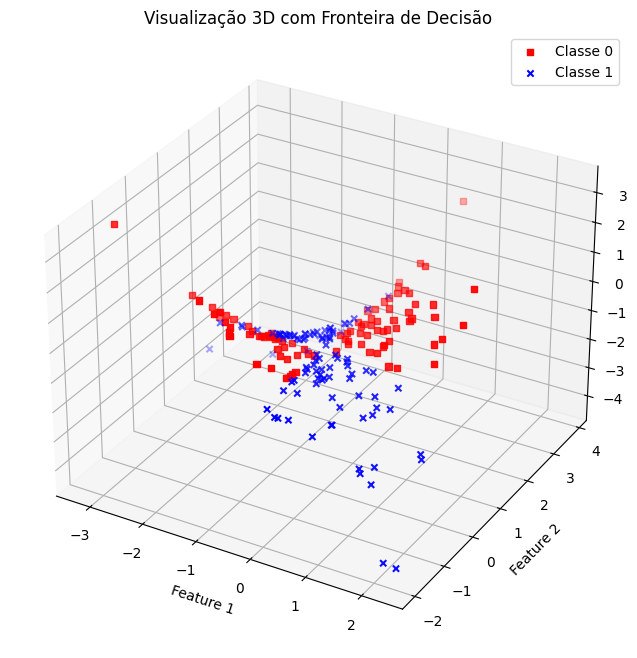

In [20]:
# 4. Visualização dos dados em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_xor_3d[y_xor == 0][:, 0], X_xor_3d[y_xor == 0][:, 1], X_xor_3d[y_xor == 0][:, 2], color='red', marker='s', label='Classe 0')
ax.scatter(X_xor_3d[y_xor == 1][:, 0], X_xor_3d[y_xor == 1][:, 1], X_xor_3d[y_xor == 1][:, 2], color='blue', marker='x', label='Classe 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 1 * Feature 2')
ax.set_title('Visualização 3D com Fronteira de Decisão')
ax.legend(loc='best')
plt.show()